In [3]:
%reload_ext autoreload
%autoreload 2

import copy
import os
import pickle
import diagnostics
from datasets import *
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from trainer import Stacking
from sklearn.metrics import f1_score
from trainer import CrossValidationUtils as cvu

In [4]:
# select GPU
torch.cuda.set_device(1)

In [5]:
# Fix seed to improve reproducibility
SEED = 6666
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# Train Stacked Learner

## Covid Yes/No

In [4]:
input_name = 'eco_50_first_Nodiff_samplFirst_mask_256'
size = 256

dataset = ecoSaccoDataset(input_name, target_class='covid', size=size, show_info=False)

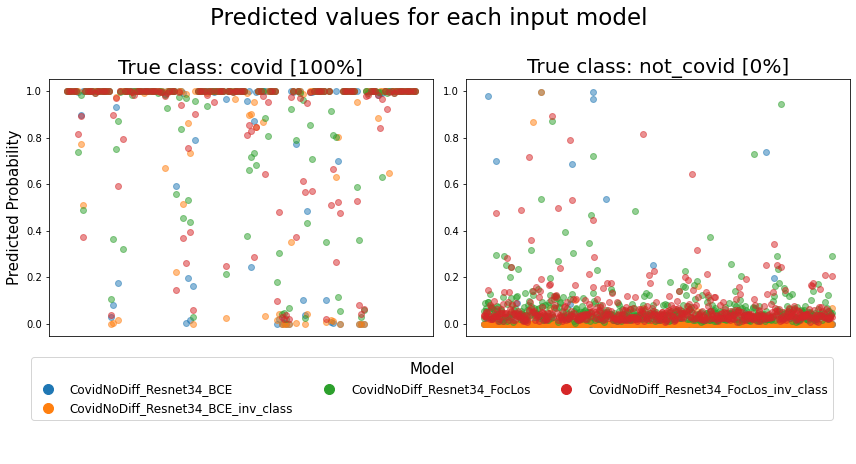

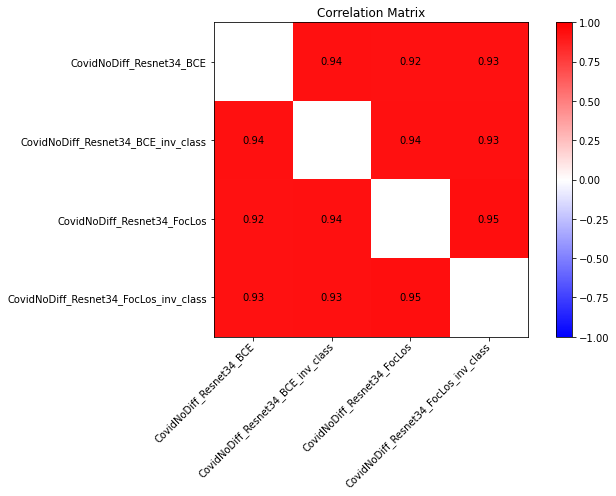


 --- Evaluating average ... Done in 0:00:00
     F1-score: 0.97166 (full set)

     binary threshold tuning log saved in results/CovidNoDiff_Stacking/tuning_results/CovidNoDiff_Stacking_average_binary_thresh_tuning.csv

 --- Evaluating majority_vote_by_label ... Done in 0:00:23
     F1-score: 0.96997 (full set)

     binary threshold tuning log saved in results/CovidNoDiff_Stacking/tuning_results/CovidNoDiff_Stacking_majority_vote_by_label_binary_thresh_tuning.csv

 --- Evaluating median ... Done in 0:00:00
     F1-score: 0.97319 (full set)

     binary threshold tuning log saved in results/CovidNoDiff_Stacking/tuning_results/CovidNoDiff_Stacking_median_binary_thresh_tuning.csv

 --- Training GBM ... Done in 0:23:05
     F1-score: 0.97755 (validation folds average)  0.97763 (full set)

     best model (for all split) saved in checkpoints/CovidNoDiff_Stacking_final_GBM.pickle (0.2 MB)
     tuning log saved in results/CovidNoDiff_Stacking/tuning_results/CovidNoDiff_Stacking_GBM_param_tu

job exception: list index out of range



     ######## ATPE failed. Elapsed: 0:03:01
     Error: list index out of range

     Trying with TPE ... Done in 0:24:33
     F1-score: 0.97293 (validation folds average)  0.97312 (full set)

     best model (for all split) saved in checkpoints/CovidNoDiff_Stacking_final_KNeighbors.pickle (0.1 MB)
     tuning log saved in results/CovidNoDiff_Stacking/tuning_results/CovidNoDiff_Stacking_KNeighbors_param_tuning.csv
     binary threshold tuning log saved in results/CovidNoDiff_Stacking/tuning_results/CovidNoDiff_Stacking_KNeighbors_binary_thresh_tuning.csv

 --- Training SVM ... 

job exception: list index out of range



     ######## ATPE failed. Elapsed: 0:01:35
     Error: list index out of range

     Trying with TPE ... Done in 0:20:48
     F1-score: 0.97152 (validation folds average)  0.97159 (full set)

     best model (for all split) saved in checkpoints/CovidNoDiff_Stacking_final_SVM.pickle (0.1 MB)
     tuning log saved in results/CovidNoDiff_Stacking/tuning_results/CovidNoDiff_Stacking_SVM_param_tuning.csv
     binary threshold tuning log saved in results/CovidNoDiff_Stacking/tuning_results/CovidNoDiff_Stacking_SVM_binary_thresh_tuning.csv

 --- Training passive_aggressive ... Done in 0:02:09
     F1-score: 0.96869 (validation folds average)  0.96876 (full set)

     best model (for all split) saved in checkpoints/CovidNoDiff_Stacking_final_passive_aggressive.pickle (0.1 MB)
     tuning log saved in results/CovidNoDiff_Stacking/tuning_results/CovidNoDiff_Stacking_passive_aggressive_param_tuning.csv

 --- Training perceptron_elastic_net ... Done in 0:02:24
     F1-score: 0.96831 (validation 

job exception: list index out of range



     ######## ATPE failed. Elapsed: 0:00:25
     Error: list index out of range

     Trying with TPE ... Done in 0:27:47
     F1-score: 0.97152 (validation folds average)  0.97159 (full set)

     best model (for all split) saved in checkpoints/CovidNoDiff_Stacking_final_MLP.pickle (0.1 MB)
     tuning log saved in results/CovidNoDiff_Stacking/tuning_results/CovidNoDiff_Stacking_MLP_param_tuning.csv
     binary threshold tuning log saved in results/CovidNoDiff_Stacking/tuning_results/CovidNoDiff_Stacking_MLP_binary_thresh_tuning.csv


Stacked learner results:


,learner,n_splits,perf_metric,avg_fold_perf,full_set_perf,best_binary_thresh,time,size
0,CovidNoDiff_Resnet34_BCE,5,F1-score,0.951681,0.951825,0.50,0:00:00,
1,CovidNoDiff_Resnet34_BCE_inv_class,5,F1-score,0.960367,0.960526,0.50,0:00:00,
2,CovidNoDiff_Resnet34_FocLos,5,F1-score,0.957267,0.957730,0.50,0:00:00,
3,CovidNoDiff_Resnet34_FocLos_inv_class,5,F1-score,0.957720,0.957847,0.50,0:00:00,
4,average,0,F1-score,0.971660,0.971660,0.32,0:00:00,
5,majority_vote_by_label,0,F1-score,0.969970,0.969970,0.17,0:00:23,
6,median,0,F1-score,0.973190,0.973190,0.16,0:00:00,
7,GBM,5,F1-score,0.977550,0.977630,0.48,0:23:05,0.2 MB
8,RandomForest,5,F1-score,0.968340,0.968430,0.64,0:29:32,0.3 MB
9,KNeighbors,5,F1-score,0.972930,0.973120,0.07,0:24:33,0.1 MB


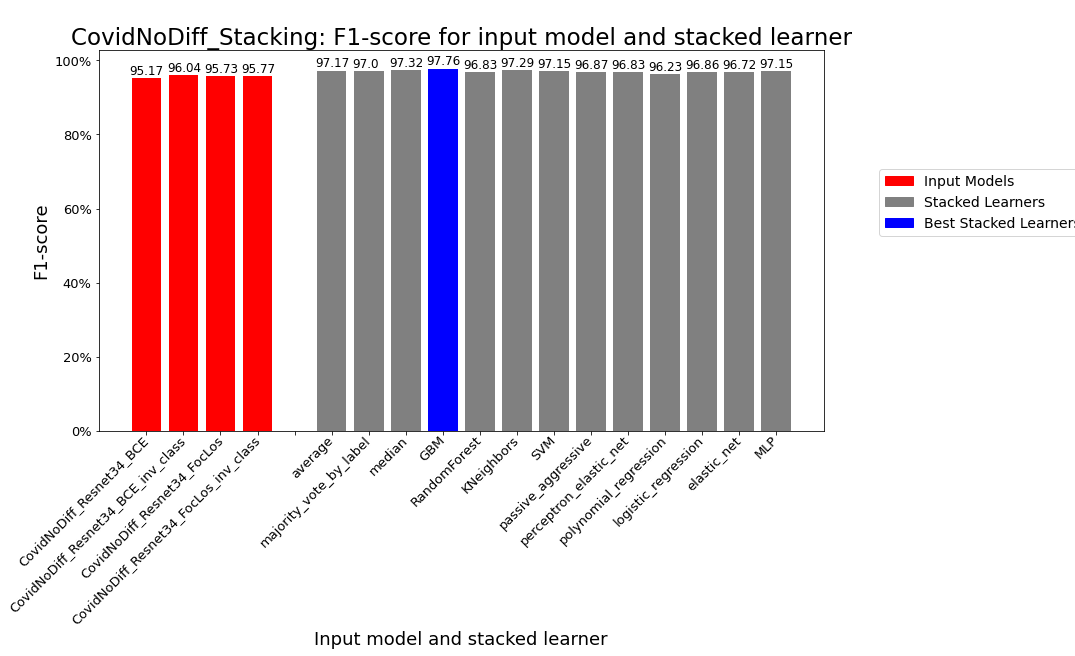

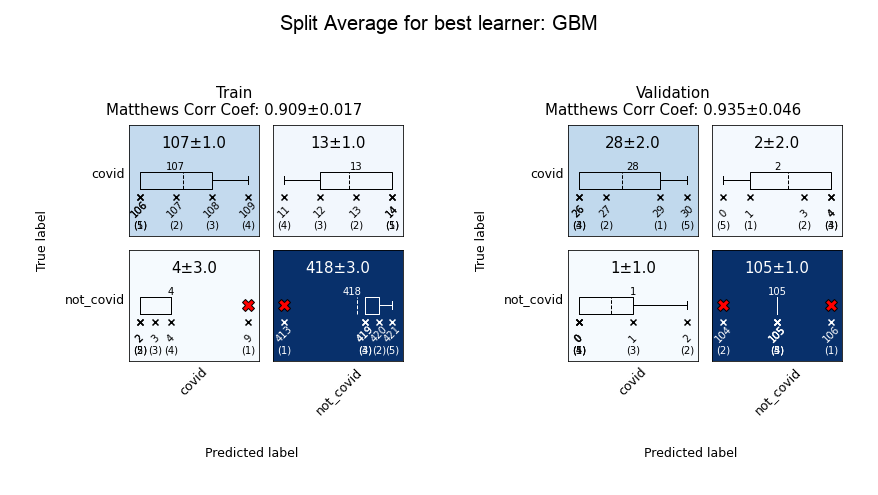

In [5]:
model_ID = 'CovidNoDiff_Stacking'
model_ID_to_stack = ['CovidNoDiff_Resnet34_BCE', 'CovidNoDiff_Resnet34_BCE_inv_class',
                     'CovidNoDiff_Resnet34_FocLos', 'CovidNoDiff_Resnet34_FocLos_inv_class']



binary_thresh_1st_level = 'best'
multi_class_mode_1st_level = 'max'
learner_2nd_level_set = []
n_splits_2nd_level = 5
binary_thresh_2nd_level = 'best'
perf_metric = {'name': 'F1-score',
               'metric': lambda y_true, y_pred : f1_score(y_true, y_pred, average='weighted', zero_division=0),
               'minimize': False}
multi_class_mode_2nd_level = 'max'
split_seed_2nd_level = 66
optim_max_iter = 1000


stacking = Stacking(dataset = dataset, model_ID_to_stack = model_ID_to_stack, model_ID = model_ID)
stacking.perform_stacking(binary_thresh_1st_level = binary_thresh_1st_level, multi_class_mode_1st_level = multi_class_mode_1st_level,
                          learner_2nd_level_set = learner_2nd_level_set, n_splits_2nd_level = n_splits_2nd_level,
                          binary_thresh_2nd_level = binary_thresh_2nd_level, perf_metric = perf_metric,
                          multi_class_mode_2nd_level = multi_class_mode_2nd_level,
                          split_seed_2nd_level = split_seed_2nd_level, optim_max_iter = optim_max_iter)
stacking.select_best_learner(sort_by='avg_fold_perf')

## Akinetic Yes/No

In [6]:
input_name = 'eco_50_first_Nodiff_samplFirst_mask_256'
size = 256

dataset = ecoSaccoDataset(input_name, target_class='akinetic', size=size, show_info=False)

/home/alessandro/.conda/envs/defeatcovid19/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


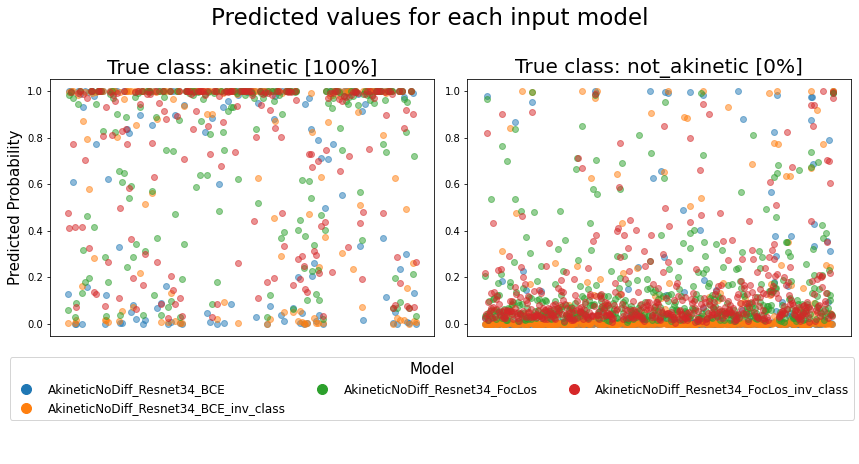

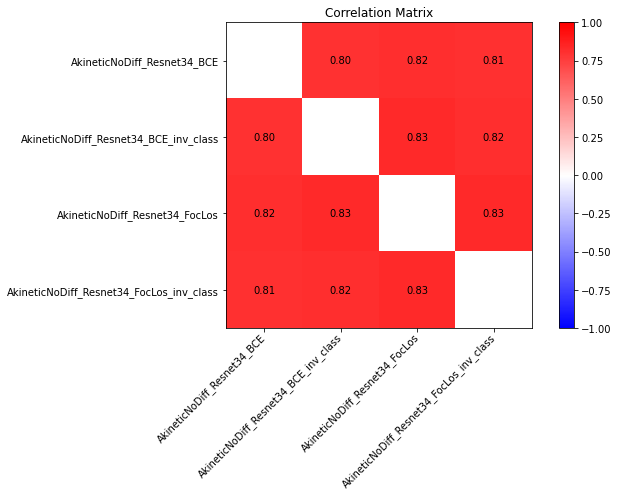


 --- Evaluating average ... Done in 0:00:00
     F1-score: 0.90174 (full set)

     binary threshold tuning log saved in results/AkineticNoDiff_Stacking/tuning_results/AkineticNoDiff_Stacking_average_binary_thresh_tuning.csv

 --- Evaluating majority_vote_by_label ... Done in 0:00:23
     F1-score: 0.90283 (full set)

     binary threshold tuning log saved in results/AkineticNoDiff_Stacking/tuning_results/AkineticNoDiff_Stacking_majority_vote_by_label_binary_thresh_tuning.csv

 --- Evaluating median ... Done in 0:00:00
     F1-score: 0.90206 (full set)

     binary threshold tuning log saved in results/AkineticNoDiff_Stacking/tuning_results/AkineticNoDiff_Stacking_median_binary_thresh_tuning.csv

 --- Training GBM ... Done in 0:23:21
     F1-score: 0.90995 (validation folds average)  0.91007 (full set)

     best model (for all split) saved in checkpoints/AkineticNoDiff_Stacking_final_GBM.pickle (0.2 MB)
     tuning log saved in results/AkineticNoDiff_Stacking/tuning_results/AkineticN

job exception: list index out of range



     ######## ATPE failed. Elapsed: 0:01:41
     Error: list index out of range

     Trying with TPE ... Done in 0:24:31
     F1-score: 0.90406 (validation folds average)  0.90407 (full set)

     best model (for all split) saved in checkpoints/AkineticNoDiff_Stacking_final_KNeighbors.pickle (0.1 MB)
     tuning log saved in results/AkineticNoDiff_Stacking/tuning_results/AkineticNoDiff_Stacking_KNeighbors_param_tuning.csv
     binary threshold tuning log saved in results/AkineticNoDiff_Stacking/tuning_results/AkineticNoDiff_Stacking_KNeighbors_binary_thresh_tuning.csv

 --- Training SVM ... 

job exception: list index out of range



     ######## ATPE failed. Elapsed: 0:04:19
     Error: list index out of range

     Trying with TPE ... Done in 0:22:27
     F1-score: 0.90225 (validation folds average)  0.90231 (full set)

     best model (for all split) saved in checkpoints/AkineticNoDiff_Stacking_final_SVM.pickle (0.1 MB)
     tuning log saved in results/AkineticNoDiff_Stacking/tuning_results/AkineticNoDiff_Stacking_SVM_param_tuning.csv
     binary threshold tuning log saved in results/AkineticNoDiff_Stacking/tuning_results/AkineticNoDiff_Stacking_SVM_binary_thresh_tuning.csv

 --- Training passive_aggressive ... Done in 0:02:09   #######   (10/1000 trials failed)
     F1-score: 0.89662 (validation folds average)  0.89667 (full set)

     best model (for all split) saved in checkpoints/AkineticNoDiff_Stacking_final_passive_aggressive.pickle (0.1 MB)
     tuning log saved in results/AkineticNoDiff_Stacking/tuning_results/AkineticNoDiff_Stacking_passive_aggressive_param_tuning.csv

 --- Training perceptron_elastic

job exception: list index out of range



     ######## ATPE failed. Elapsed: 0:16:50
     Error: list index out of range

     Trying with TPE ... Done in 0:28:17
     F1-score: 0.87693 (validation folds average)  0.87688 (full set)

     best model (for all split) saved in checkpoints/AkineticNoDiff_Stacking_final_polynomial_regression.pickle (0.1 MB)
     tuning log saved in results/AkineticNoDiff_Stacking/tuning_results/AkineticNoDiff_Stacking_polynomial_regression_param_tuning.csv
     binary threshold tuning log saved in results/AkineticNoDiff_Stacking/tuning_results/AkineticNoDiff_Stacking_polynomial_regression_binary_thresh_tuning.csv

 --- Training logistic_regression ... Done in 0:00:01
     F1-score: 0.89553 (validation folds average)  0.89544 (full set)

     best model (for all split) saved in checkpoints/AkineticNoDiff_Stacking_final_logistic_regression.pickle (0.1 MB)
     tuning log saved in results/AkineticNoDiff_Stacking/tuning_results/AkineticNoDiff_Stacking_logistic_regression_param_tuning.csv
     binary 

job exception: list index out of range



     ######## ATPE failed. Elapsed: 0:11:51
     Error: list index out of range

     Trying with TPE ... Done in 0:32:34
     F1-score: 0.90401 (validation folds average)  0.90407 (full set)

     best model (for all split) saved in checkpoints/AkineticNoDiff_Stacking_final_MLP.pickle (0.1 MB)
     tuning log saved in results/AkineticNoDiff_Stacking/tuning_results/AkineticNoDiff_Stacking_MLP_param_tuning.csv
     binary threshold tuning log saved in results/AkineticNoDiff_Stacking/tuning_results/AkineticNoDiff_Stacking_MLP_binary_thresh_tuning.csv


Stacked learner results:


,learner,n_splits,perf_metric,avg_fold_perf,full_set_perf,best_binary_thresh,time,size
0,AkineticNoDiff_Resnet34_BCE,5,F1-score,0.876752,0.877119,0.50,0:00:00,
1,AkineticNoDiff_Resnet34_BCE_inv_class,5,F1-score,0.874966,0.875262,0.50,0:00:00,
2,AkineticNoDiff_Resnet34_FocLos,5,F1-score,0.865618,0.866245,0.50,0:00:00,
3,AkineticNoDiff_Resnet34_FocLos_inv_class,5,F1-score,0.867504,0.867757,0.50,0:00:00,
4,average,0,F1-score,0.901740,0.901740,0.36,0:00:00,
5,majority_vote_by_label,0,F1-score,0.902830,0.902830,0.18,0:00:23,
6,median,0,F1-score,0.902060,0.902060,0.26,0:00:00,
7,GBM,5,F1-score,0.909950,0.910070,0.42,0:23:21,0.2 MB
8,RandomForest,5,F1-score,0.898120,0.898360,0.66,0:52:26,1.5 MB
9,KNeighbors,5,F1-score,0.904060,0.904070,0.29,0:24:31,0.1 MB


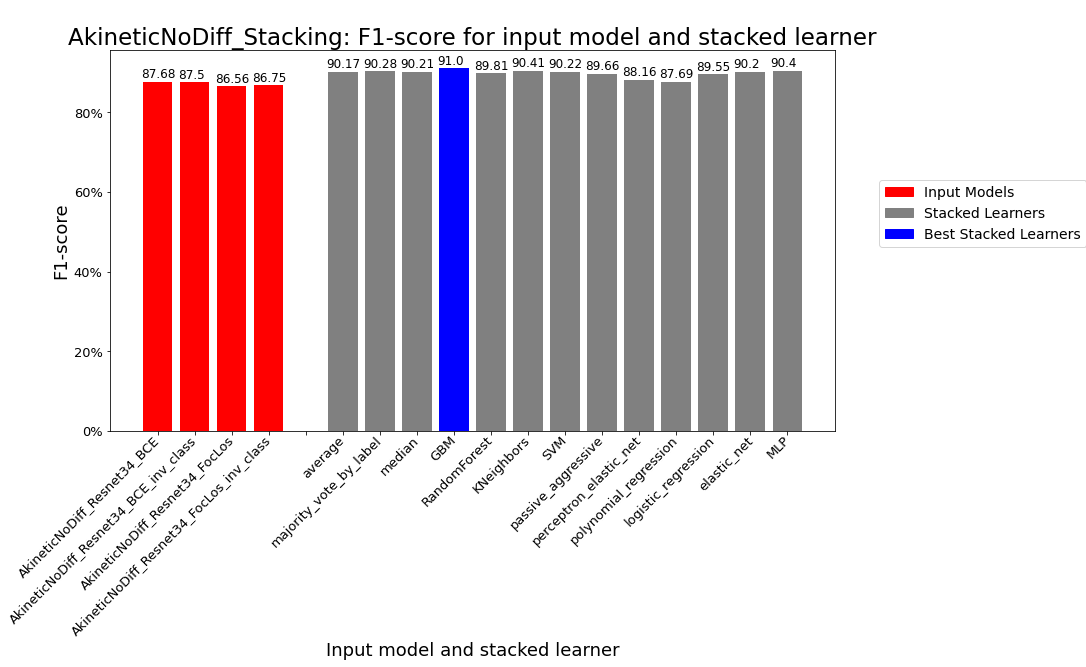

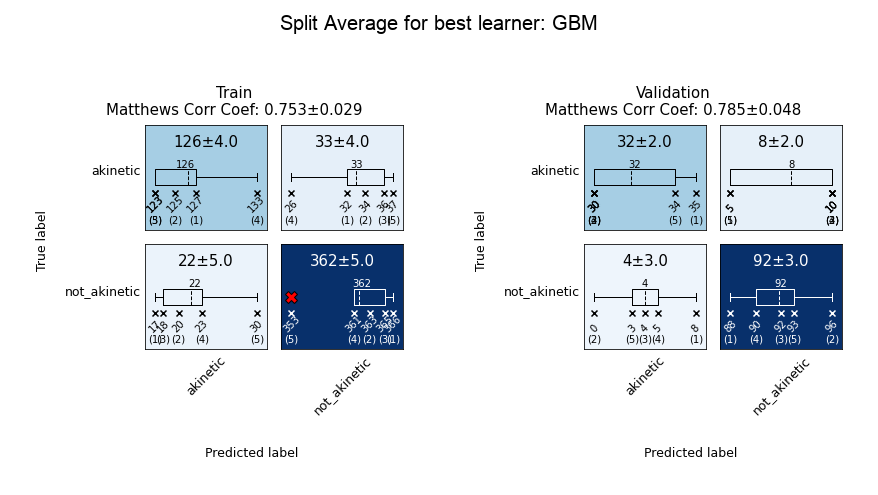

In [7]:
model_ID = 'AkineticNoDiff_Stacking'
model_ID_to_stack = ['AkineticNoDiff_Resnet34_BCE', 'AkineticNoDiff_Resnet34_BCE_inv_class',
                     'AkineticNoDiff_Resnet34_FocLos', 'AkineticNoDiff_Resnet34_FocLos_inv_class']



binary_thresh_1st_level = 'best'
multi_class_mode_1st_level = 'max'
learner_2nd_level_set = []
n_splits_2nd_level = 5
binary_thresh_2nd_level = 'best'
perf_metric = {'name': 'F1-score',
               'metric': lambda y_true, y_pred : f1_score(y_true, y_pred, average='weighted', zero_division=0),
               'minimize': False}
multi_class_mode_2nd_level = 'max'
split_seed_2nd_level = 66
optim_max_iter = 1000


stacking = Stacking(dataset = dataset, model_ID_to_stack = model_ID_to_stack, model_ID = model_ID)
stacking.perform_stacking(binary_thresh_1st_level = binary_thresh_1st_level, multi_class_mode_1st_level = multi_class_mode_1st_level,
                          learner_2nd_level_set = learner_2nd_level_set, n_splits_2nd_level = n_splits_2nd_level,
                          binary_thresh_2nd_level = binary_thresh_2nd_level, perf_metric = perf_metric,
                          multi_class_mode_2nd_level = multi_class_mode_2nd_level,
                          split_seed_2nd_level = split_seed_2nd_level, optim_max_iter = optim_max_iter)
stacking.select_best_learner(sort_by='avg_fold_perf')

# Test best stacked learner prediction on wrong input models predictions

In [6]:
model_ID = 'CovidNoDiff_Stacking'
model_ID_to_stack = ['CovidNoDiff_Resnet34_BCE', 'CovidNoDiff_Resnet34_BCE_inv_class',
                     'CovidNoDiff_Resnet34_FocLos', 'CovidNoDiff_Resnet34_FocLos_inv_class']
stacked_learner = 'GBM'


input_name = 'eco_50_first_Nodiff_samplFirst_mask_256'
size = 256

dataset = ecoSaccoDataset(input_name, target_class='covid', size=size, show_info=False)

pred_dict = {}
index_to_test = np.array([])
for mod in model_ID_to_stack:
    pred=cvu.predict_dataset(model_ID = mod+'_full', dataset = dataset, new_index = np.array(dataset.df.index),
                              batch_size=64, binary_thresh=0.5, show_result=False)['prediction']
    pred_dict[mod] = pred
    index_to_test = np.append(index_to_test, pred[pred.true != pred.pred_class].index)
index_to_test = sorted(np.unique(index_to_test).astype(int))
image_to_test = pd.DataFrame(index = index_to_test).merge(dataset.df[['image', 'label']],
                                                          left_index=True, right_index=True).rename(columns={'label': 'true'})
for mod in model_ID_to_stack:
    pred = pred_dict[mod]
    pred[mod.split('Resnet34_')[1]] = pred.apply(lambda row: str(int(row.pred_class))+' wrong' if row.true != row.pred_class else str(int(row.pred_class)), axis=1)
    image_to_test = image_to_test.merge(pred[mod.split('Resnet34_')[1]], left_index=True, right_index=True)
image_to_test = image_to_test.sort_values(by='true').reset_index(drop=True)

stacking = Stacking(dataset = dataset, model_ID_to_stack = model_ID_to_stack, model_ID = model_ID, plot_distribution=False)
out = stacking.predict(new_prediction_path = image_to_test.image,
                       stacked_learner = 'GBM',
                       input_split_averaging = 'average',
                       final_output_averaging = 'average')
final_comparison = image_to_test.merge(out['prediction'][['image', 'pred_label']], on='image')
final_comparison['pred_label'] = final_comparison.apply(lambda row: str(int(row.pred_label))+' wrong' if row.true != row.pred_label else str(int(row.pred_label)), axis=1)
final_comparison = final_comparison.rename(columns={'pred_label': 'stacked_'+stacked_learner})
final_comparison.to_csv(os.path.join('results', model_ID, model_ID+'_learner_comparison.csv'), index=False, sep=',')
final_comparison


 --- Evaluating input models predictions ... Done in 0:00:07

 --- Evaluating stacked learner predictions ... Done in 0:00:00


,image,true,BCE,BCE_inv_class,FocLos,FocLos_inv_class,stacked_GBM
0,./input/eco_50_first_Nodiff_samplFirst_mask_25...,0,1 wrong,0,1 wrong,0,0
1,./input/eco_50_first_Nodiff_samplFirst_mask_25...,0,1 wrong,0,0,0,0
2,./input/eco_50_first_Nodiff_samplFirst_mask_25...,0,1 wrong,0,1 wrong,0,0
3,./input/eco_50_first_Nodiff_samplFirst_mask_25...,0,0,0,1 wrong,0,0
4,./input/eco_50_first_Nodiff_samplFirst_mask_25...,1,0 wrong,1,0 wrong,1,1
5,./input/eco_50_first_Nodiff_samplFirst_mask_25...,1,0 wrong,0 wrong,1,0 wrong,1
6,./input/eco_50_first_Nodiff_samplFirst_mask_25...,1,0 wrong,1,0 wrong,0 wrong,1
7,./input/eco_50_first_Nodiff_samplFirst_mask_25...,1,0 wrong,0 wrong,0 wrong,0 wrong,1
8,./input/eco_50_first_Nodiff_samplFirst_mask_25...,1,0 wrong,1,1,1,1
9,./input/eco_50_first_Nodiff_samplFirst_mask_25...,1,0 wrong,0 wrong,0 wrong,0 wrong,1


In [15]:
model_ID = 'AkineticNoDiff_Stacking'
model_ID_to_stack = ['AkineticNoDiff_Resnet34_BCE', 'AkineticNoDiff_Resnet34_BCE_inv_class',
                     'AkineticNoDiff_Resnet34_FocLos', 'AkineticNoDiff_Resnet34_FocLos_inv_class']
stacked_learner = 'GBM'


input_name = 'eco_50_first_Nodiff_samplFirst_mask_256'
size = 256

dataset = ecoSaccoDataset(input_name, target_class='akinetic', size=size, show_info=False)

pred_dict = {}
index_to_test = np.array([])
for mod in model_ID_to_stack:
    pred=cvu.predict_dataset(model_ID = mod+'_full', dataset = dataset, new_index = np.array(dataset.df.index),
                              batch_size=64, binary_thresh=0.5, show_result=False)['prediction']
    pred_dict[mod] = pred
    index_to_test = np.append(index_to_test, pred[pred.true != pred.pred_class].index)
index_to_test = sorted(np.unique(index_to_test).astype(int))
image_to_test = pd.DataFrame(index = index_to_test).merge(dataset.df[['image', 'label']],
                                                          left_index=True, right_index=True).rename(columns={'label': 'true'})
for mod in model_ID_to_stack:
    pred = pred_dict[mod]
    pred[mod.split('Resnet34_')[1]] = pred.apply(lambda row: str(int(row.pred_class))+' wrong' if row.true != row.pred_class else str(int(row.pred_class)), axis=1)
    image_to_test = image_to_test.merge(pred[mod.split('Resnet34_')[1]], left_index=True, right_index=True)
image_to_test = image_to_test.sort_values(by='true').reset_index(drop=True)

stacking = Stacking(dataset = dataset, model_ID_to_stack = model_ID_to_stack, model_ID = model_ID, plot_distribution=False)
out = stacking.predict(new_prediction_path = image_to_test.image,
                       stacked_learner = 'GBM',
                       input_split_averaging = 'average',
                       final_output_averaging = 'average')
final_comparison = image_to_test.merge(out['prediction'][['image', 'pred_label']], on='image')
final_comparison['pred_label'] = final_comparison.apply(lambda row: str(int(row.pred_label))+' wrong' if row.true != row.pred_label else str(int(row.pred_label)), axis=1)
final_comparison = final_comparison.rename(columns={'pred_label': 'stacked_'+stacked_learner})
final_comparison.to_csv(os.path.join('results', model_ID, model_ID+'_learner_comparison.csv'), index=False, sep=',')
final_comparison

/home/alessandro/.conda/envs/defeatcovid19/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



 --- Evaluating input models predictions ... Done in 0:00:12

 --- Evaluating stacked learner predictions ... Done in 0:00:00


,image,true,BCE,BCE_inv_class,FocLos,FocLos_inv_class,stacked_GBM
0,./input/eco_50_first_Nodiff_samplFirst_mask_25...,0,1 wrong,1 wrong,1 wrong,1 wrong,0
1,./input/eco_50_first_Nodiff_samplFirst_mask_25...,0,0,0,0,1 wrong,1 wrong
2,./input/eco_50_first_Nodiff_samplFirst_mask_25...,0,1 wrong,1 wrong,0,0,0
3,./input/eco_50_first_Nodiff_samplFirst_mask_25...,0,0,0,1 wrong,0,0
4,./input/eco_50_first_Nodiff_samplFirst_mask_25...,0,0,0,1 wrong,0,0
5,./input/eco_50_first_Nodiff_samplFirst_mask_25...,0,0,0,0,1 wrong,0
6,./input/eco_50_first_Nodiff_samplFirst_mask_25...,0,1 wrong,0,0,0,0
7,./input/eco_50_first_Nodiff_samplFirst_mask_25...,0,0,0,1 wrong,1 wrong,0
8,./input/eco_50_first_Nodiff_samplFirst_mask_25...,0,0,1 wrong,1 wrong,1 wrong,0
9,./input/eco_50_first_Nodiff_samplFirst_mask_25...,0,0,0,1 wrong,0,0
